In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR

#visaualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

In [2]:
# Find out your current working directory
#import os
#print(os.getcwd())

# Out: /Users/shane/Documents/blog

# Display all of the files found in your current working directory
#print(os.listdir(os.getcwd()))

In [3]:
wine = pd.read_csv("winequalityN-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


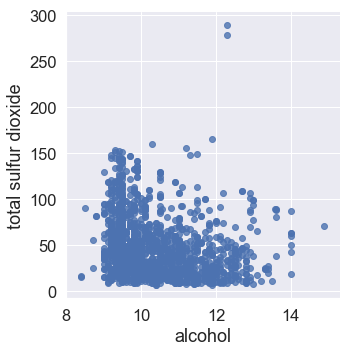

In [4]:
#plotting two features as a visualization
#sns.lmplot ('fixed acidity', 'residual sugar', data = wine, hue = 'type', palette = 'Set1', fit_reg = False )
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, palette = 'Set2', fit_reg = False )

In [5]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 5               7.4             0.660         0.00             1.8      0.075   
 6               7.9             0.600         0.06             1.6      0.069   
 7               7.3             0.650         0.00             1.2      0.065   
 8               7.8             0.580         0.02             2.0      0.073   
 9               7.5             0.500         0.36             6.1      0.071   
 10              6.7             0.580         0.08             1.8      0.097   
 11             

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1067, 11)
(526, 11)
(1067,)
(526,)


In [7]:
from sklearn.preprocessing import StandardScaler
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_train.mean())
print(X_train.shape)
print(y_train.shape)

[[-0.27114458  0.59878201 -1.36458159 ... -0.02674119 -0.1527553
   0.52106712]
 [-0.73608836  0.15865429 -0.48954552 ...  0.81819524  0.14060306
   0.10515759]
 [-0.8523243   0.48875008 -0.95279991 ...  0.68820502  0.96200648
  -0.86529799]
 ...
 [ 1.87922039 -1.93195238  1.26052664 ... -0.22172652  1.84208156
  -0.31075194]
 [ 1.29804067 -1.38179273  1.26052664 ... -0.7416874   1.37270818
  -0.95772233]
 [-0.4454985   0.21367025 -1.26163617 ...  0.29823436 -0.21142697
   0.33621844]]
4.627426971514242e-15
(1067, 11)
(1067,)


In [8]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [7]
 [6]
 ...
 [6]
 [6]
 [6]]
[[5]
 [3]
 [6]
 [6]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [5]
 [7]
 [7]
 [5]
 [7]
 [7]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [5]
 [6]
 [5]
 [6]
 [3]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [6]
 [4]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [6]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [7]
 [7]
 [4]
 [5]
 [6]
 [5]
 [6]
 [7]
 [6]
 [5]
 [5]
 [7]
 [5]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [6]
 [5]
 [7]
 [6]
 [6]
 [5]
 [6]
 [6]
 [7]
 [5]
 [6]
 [6]
 [7]
 [6]
 [7]
 [5]
 [6]
 [5]
 [7]
 [6]
 [6]
 [5]
 [5]
 [6]
 [5]
 [6]
 [7]
 [6]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [6]
 [6]
 [7]
 [6]
 [5]
 [6]
 [5]
 [7]
 [7]
 [5]
 [6]
 [7]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [7]
 [6]
 [6]
 [7]
 [5]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [7]
 [6]
 [7]
 [5]
 [5]
 [6]
 [6]
 [4]
 [7]
 [6]
 [7]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]

In [9]:
#fitting the model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[5 6 6 6 6 5 6 5 5 6 6 5 7 5 5 6 7 5 6 6 6 5 5 6 6 6 5 5 6 5 5 5 6 5 6 5 5
 5 6 6 6 6 6 5 5 6 6 6 5 6 5 5 5 6 6 6 5 6 5 5 5 5 5 5 5 6 6 5 5 6 5 5 7 6
 5 5 6 6 5 6 5 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 5 6 6 5 5 5 5 5 5 7
 6 5 5 5 6 6 6 5 6 5 6 6 5 5 5 6 5 6 6 5 6 5 7 7 6 6 7 6 5 6 5 5 5 6 6 6 6
 7 5 6 6 5 6 5 5 5 6 6 6 6 6 5 7 5 6 6 5 5 6 5 6 6 5 5 5 5 6 5 6 5 5 5 6 6
 5 5 6 6 5 6 6 6 5 5 6 6 7 5 6 5 6 5 7 5 6 6 5 6 5 6 5 5 6 5 6 5 6 6 6 6 6
 5 7 6 6 6 6 7 6 5 5 6 6 5 5 5 7 6 5 5 5 6 6 5 6 6 5 6 6 5 5 6 5 6 6 6 5 6
 5 5 5 6 5 6 6 5 5 5 5 6 5 5 6 6 7 6 6 6 6 5 5 6 5 7 5 5 5 5 6 6 6 6 5 6 6
 6 5 5 5 6 6 6 6 5 6 7 6 6 5 5 5 5 6 6 5 5 6 6 5 6 6 6 5 5 5 6 5 5 5 6 5 5
 6 5 6 5 5 6 5 6 6 5 6 6 6 6 5 5 6 5 6 5 6 5 5 5 6 5 5 5 5 6 6 6 6 6 6 6 6
 5 7 6 5 6 5 6 7 5 5 6 6 6 5 7 5 6 6 7 5 5 6 5 6 6 5 5 5 6 6 6 6 6 7 6 6 6
 6 6 6 5 5 6 5 5 6 6 6 6 6 5 5 6 5 5 6 6 5 5 6 6 6 6 5 6 6 6 6 6 6 5 7 6 6
 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 6 6 5 5 6 5 6 6 6 5 6 5 6 5 5 6 5 5 5 5 6 5
 6 6 5 6 6 7 6 5 5 6 5 5 

In [11]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0   3   1   0   0]
 [  0   0   9   5   0   0]
 [  0   0 161  57   2   0]
 [  0   0  64 147   7   0]
 [  0   0   5  46  15   0]
 [  0   0   0   4   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.67      0.73      0.70       220
           6       0.57      0.67      0.62       218
           7       0.62      0.23      0.33        66
           8       0.00      0.00      0.00         4

   micro avg       0.61      0.61      0.61       526
   macro avg       0.31      0.27      0.27       526
weighted avg       0.59      0.61      0.59       526

0.6140684410646388


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(rms)
print(mae)

0.713796682131581
0.42585551330798477
